In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Character + Digits data.zip/Character + Digits data/characters-digits-train.zip", 'r')#LOCATION OF FILE
zip_ref.extractall("/content/emnist")#EXTRACT TO EMNIST FOLDER
zip_ref.close()

In [0]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Character + Digits data.zip/Character + Digits data/characters-digits-test.zip", 'r')#LOCATION OF FILE
zip_ref.extractall("/content/emnist")#EXTRACT TO EMNIST FOLDER
zip_ref.close()

In [0]:
train_data_path = '/content/emnist/characters-digits-train.csv'#PATH OF TRAIN DATA
test_data_path = '/content/emnist/characters-digits-test.csv'#PATH OF TEST DATA

In [0]:
train_data = pd.read_csv(train_data_path,header=None)
test_data = pd.read_csv(test_data_path,header = None)

In [0]:
class_mapping='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
class_mapping1 = ['even','odd','even','odd','even','odd','even','odd','even','odd','Vowel','consonant','consonant','consonnat','Vowel',
                  'consonant','consonant','consonant','vowel','consonant','consonant','consonant','consonant','consonant','vowel',
                  'consonant','consonant','consonant','consonant','consonant','vowel','consonant','consonant','consonant','consonant',
                  'consonant','vowel','consonant','consonnat','Vowel','consonant','consonant','consonant','consonant','consonant',
                  'consonant','constant']

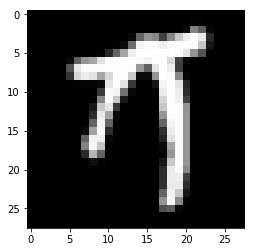

In [8]:
num_classes = 47
row_num = 8
plt.imshow(train_data.values[row_num,1:].reshape([28, 28]), cmap='Greys_r')

plt.show()

In [0]:
def show_img(data,row_num):
    img_flip = np.transpose(train_data.values[row_num,1:].reshape(28,28))
    plt.title("Class:" + str(data.values[row_num,0]) + "     Label:" + str(class_mapping1[data.values[row_num,0]]))
    plt.imshow(img_flip,cmap = 'Greys_r')
    
    plt.show()

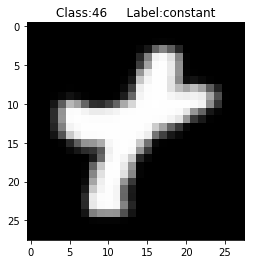

In [10]:
show_img(train_data,10)

In [0]:
num_classes = 47 
img_size = 28

def img_label_load(data_path, num_classes=None):
    data = pd.read_csv(data_path, header=None)
    data_rows = len(data)
    if not num_classes:
        num_classes = len(data[0].unique())
    
    # this assumes square imgs. Should be 28x28
    img_size = int(np.sqrt(len(data.iloc[0][1:])))
    
    # Images need to be transposed. This line also does the reshaping needed.
    imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays
    
    labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors
    
    return imgs/255., labels

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 11 ,kernel_size = (5,5) ,strides = 1 , activation = 'relu',
                              input_shape=(img_size,img_size,1) ))

model.add(keras.layers.Conv2D(filters = 21,kernel_size =(3,3) , strides = 1, activation = 'relu'))
model.add(keras.layers.Conv2D(filters = 31,kernel_size =(3,3) , strides = 1, activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters = 41,kernel_size =(3,3) , strides = 1, activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 512,activation = 'relu'))
model.add(keras.layers.Dense(units = num_classes,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 11)        286       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 21)        2100      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 31)        5890      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 31)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 41)          11480     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 41)          0         
_________________________________________

In [13]:
X, y = img_label_load(train_data_path)
print(X.shape)
print(y.shape)

(112800, 28, 28, 1)
(112800, 47)


In [15]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 24, 24, 11]
[None, 22, 22, 21]
[None, 20, 20, 31]
[None, 10, 10, 31]
[None, 8, 8, 41]
[None, 4, 4, 41]
[None, 656]
[None, 512]
[None, 47]


In [16]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=10, # can change epochs to 10
                              validation_data=validation_data_generator)

Epoch 1/10
500/500 [==============================] - 9s 18ms/step - loss: 1.1801 - acc: 0.6560 - val_loss: 0.6850 - val_acc: 0.7785
Epoch 2/10
500/500 [==============================] - 9s 18ms/step - loss: 0.6232 - acc: 0.7946 - val_loss: 0.5785 - val_acc: 0.8098
Epoch 3/10
500/500 [==============================] - 9s 18ms/step - loss: 0.5230 - acc: 0.8226 - val_loss: 0.5360 - val_acc: 0.8110
Epoch 4/10
500/500 [==============================] - 9s 18ms/step - loss: 0.4647 - acc: 0.8381 - val_loss: 0.4495 - val_acc: 0.8474
Epoch 5/10
500/500 [==============================] - 9s 18ms/step - loss: 0.4430 - acc: 0.8436 - val_loss: 0.4331 - val_acc: 0.8508
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 0.4090 - acc: 0.8520 - val_loss: 0.4150 - val_acc: 0.8565
Epoch 7/10
500/500 [==============================] - 9s 18ms/step - loss: 0.3792 - acc: 0.8632 - val_loss: 0.4031 - val_acc: 0.8625
Epoch 8/10
500/500 [==============================] - 9s 18ms/step - 

In [17]:
test_X, test_y = img_label_load(test_data_path)
test_data_generator = data_generator.flow(X, y)

model.evaluate_generator(test_data_generator)


[0.3270429401997979, 0.87822694]

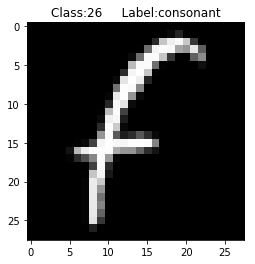

In [18]:
test_data = pd.read_csv(test_data_path, header=None)
show_img(test_data,3)

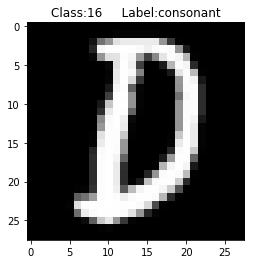

In [25]:
X_test, y_test = img_label_load(test_data_path)
def run_prediction(idx):
    result = np.argmax(model.predict(X_test[idx:idx+1]))
   
    print('Prediction: ', result, ', Label: ', class_mapping1[result])
    print('Target: ', test_data.values[idx,0])
    
show_img(test_data, idx)

In [28]:
import random

for _ in range(1,10):
    idx = random.randint(0, 47-1)
    run_prediction(idx)

Prediction:  3 , Label:  odd
Target:  3
Prediction:  6 , Label:  even
Target:  6
Prediction:  35 , Label:  consonant
Target:  2
Prediction:  28 , Label:  consonant
Target:  28
Prediction:  44 , Label:  consonant
Target:  44
Prediction:  40 , Label:  consonant
Target:  40
Prediction:  37 , Label:  consonant
Target:  37
Prediction:  27 , Label:  consonant
Target:  11
Prediction:  41 , Label:  consonant
Target:  44
